<font color = "blue">
Q1) Countries Above or Below the Global Average


<font color = "blue">Q2) Year-on-Year Comparison Between India and the United States


<font color = "blue">Q3) Classification of Countries Based on Unemployment Ratios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("unemployment analysis.csv")

In [ ]:
df.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [ ]:
df["Country Name"].nunique()

235

In [ ]:
df_melt = pd.melt(df , id_vars = ["Country Name" , "Country Code"] , var_name = "Year" , value_name = "unempl_ratio")

In [ ]:
df_melt.head(2)

,Country Name,Country Code,Year,unempl_ratio
0,Africa Eastern and Southern,AFE,1991,7.80
1,Afghanistan,AFG,1991,10.65


pd.melt used to convert years into row wise analysis rather than column wise analysis

In [ ]:
df_melt["Country Name"].nunique()

235

In [ ]:
round(df_melt["unempl_ratio"].mean() ,2)

8.01

<font color = "red">Average unemployeed ratio = 8.01

In [ ]:
df_unemp_mean = df_melt.groupby("Country Name")["unempl_ratio"].mean().reset_index()

In [ ]:
df_unemp_mean.head(2)

,Country Name,unempl_ratio
0,Afghanistan,11.141290
1,Africa Eastern and Southern,7.244194



<font color = "blue">Q1.1) Identifying the countries with more than the overall unemployed ratio


In [ ]:
df_more = df_unemp_mean[df_unemp_mean["unempl_ratio"] >= df_unemp_mean["unempl_ratio"].mean()].sort_values("unempl_ratio" , ascending = False)

Countries With the Highest Unemployed Ratio and above the overall average

In [ ]:
df_more.head(10)

,Country Name,unempl_ratio
122,Lesotho,30.396452
159,North Macedonia,29.789677
192,South Africa,28.232581
51,Djibouti,27.733226
63,Eswatini,24.391290
22,Bosnia and Herzegovina,24.044516
146,Montenegro,23.048387
150,Namibia,21.033548
43,"Congo, Rep.",20.291613
23,Botswana,19.814839


In [ ]:
df_more["Country Name"].count()

88

Count of Country more than the overall Average unemployed ratio --> 88

<font color = "blue">Q1.2) Identifing the countries with less than the overall unemployee ratio




In [ ]:
df_less = df_unemp_mean[df_unemp_mean["unempl_ratio"] <= df_unemp_mean["unempl_ratio"].mean()].sort_values("unempl_ratio" , ascending = True)

Countries With the lowest Unemployed Ratio and below the overall average

In [ ]:
df_less.head(10)

,Country Name,unempl_ratio
176,Qatar,0.569355
30,Cambodia,0.767419
149,Myanmar,0.803548
179,Rwanda,0.916774
36,Chad,0.950000
13,Bahrain,1.164839
210,Thailand,1.315806
19,Benin,1.346452
190,Solomon Islands,1.370645
156,Niger,1.376452


In [ ]:
df_less["Country Name"].count()

147

Count of Country less than the overall Average unemployed ratio --> 147

Graphically Concluding the result

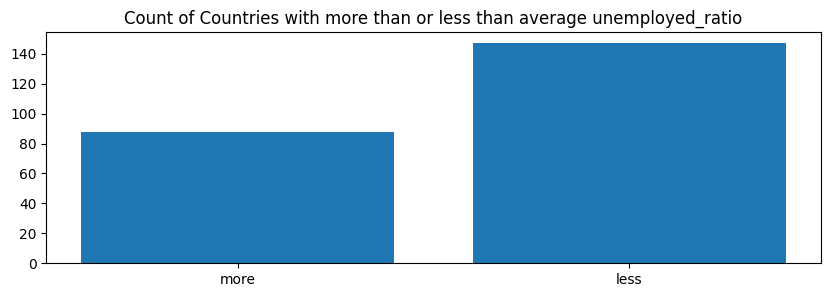

In [ ]:
categories = ["more" , "less"]
counts = [df_more["Country Name"].count() , df_less["Country Name"].count()]

plt.figure(figsize = (10,3))
plt.title("Count of Countries with more than or less than average unemployed_ratio")
plt.bar(categories , counts)
plt.show()

<font color = "blue">Q2) Comparing Two Countries year on year wise for unemployeed analysis

Comparing India and United States

In [ ]:
df_comp = df_melt[(df_melt["Country Name"] == "India") | (df_melt["Country Name"] == "United States")].sort_values(["Country Name" , "Year"])

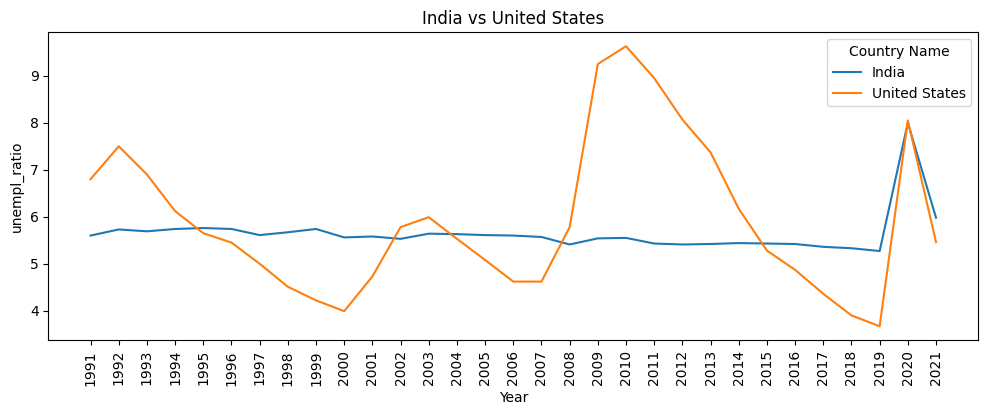

In [ ]:
plt.figure(figsize = (12,4))
plt.title("India vs United States")
plt.xticks(rotation = 90)
sns.lineplot(data = df_comp , x = "Year" , y = "unempl_ratio" , hue = "Country Name")
plt.show()


<font color = "blue">Q3) Categoring Country Based on unemployeed ratio



In [ ]:
df_unemp_mean["unempl_ratio"].max() , df_unemp_mean["unempl_ratio"].min()

(30.396451612903224, 0.5693548387096774)

In [ ]:
def encode(x):
  if x > 0 and x <= 5:
    return "low"
  elif x > 5 and x <= 10:
    return "moderate"
  elif x > 10 and x <= 20:
    return "high"
  else:
    return "very high"

df_unemp_mean["caterogy"] = df_unemp_mean["unempl_ratio"].apply(encode)

In [ ]:
df_unemp_mean.head(5)

,Country Name,unempl_ratio,caterogy
0,Afghanistan,11.141290,high
1,Africa Eastern and Southern,7.244194,moderate
2,Africa Western and Central,4.944194,low
3,Albania,16.318065,high
4,Algeria,17.926129,high


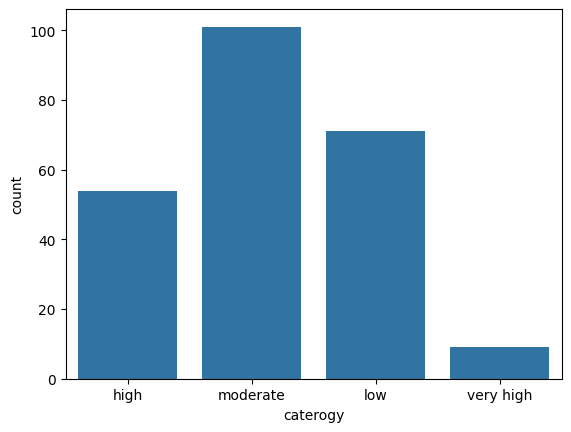

In [ ]:
sns.countplot(data = df_unemp_mean , x = "caterogy")
plt.show()